### **Análise de Distribuição de Vendas por País** 

dados: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

#### Estrutura do Projeto
**1. Exploração dos Dados:**

* Carregamento e visualização inicial dos dados.
* Análise de valores nulos e tratamento de outliers (já foi feito no arquivo 'retail_vendas.ipynb').
* Descrição estatística e visualização das variáveis.

**2. Análise de Distribuição de Vendas por País:**
    
* Identificação volume de vendas por País (quantidade).
* Identificação da receita total de vendas por País.
* Identificação do top 5 produtos mais vendidos por País.

**3. Visualizações:**

* Gráficos de barras, métricas de vendas.

**4. Fechamento e Insights:**

* Identificação de tendências e comportamentos relevantes.
* Recomendações para a empresa baseada na análise.

#### **1. Exploração dos Dados:**

**Carregamento e visualização inicial dos dados:**

In [1]:
# Carregamento e visualização inicial dos dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import plotly.express as px
import statistics as stats
import matplotlib.ticker as mtick 

In [2]:
# importar dataframe

df = pd.read_csv('retail_tratado.csv', encoding='iso-8859-1')

In [3]:
# Visualização das primeiras linhas dos dados

df.head()

,NumeroFatura,CodigoProduto,Descricao,Quantidade,DataFatura,PrecoUnitario,IDCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(530676, 8)

In [5]:
df.dtypes

NumeroFatura       int64
CodigoProduto     object
Descricao         object
Quantidade         int64
DataFatura        object
PrecoUnitario    float64
IDCliente        float64
Pais              object
dtype: object

**Análise de valores nulos e tratamento de outliers**

In [6]:
# Valores Nulos:

print(df.isnull().sum())

NumeroFatura     0
CodigoProduto    0
Descricao        0
Quantidade       0
DataFatura       0
PrecoUnitario    0
IDCliente        0
Pais             0
dtype: int64


**Descrição estatística e visualização das variáveis**

In [7]:
df.describe()

,NumeroFatura,Quantidade,PrecoUnitario,IDCliente
count,530676.000000,530676.000000,530676.000000,530676.000000
mean,559975.854389,10.574281,3.841698,11468.254722
std,13431.386041,156.390098,24.248063,6788.153074
min,536365.000000,1.000000,0.000000,0.000000
25%,547903.000000,1.000000,1.250000,0.000000
50%,560697.000000,3.000000,2.080000,14383.000000
75%,571846.000000,10.000000,4.130000,16265.000000
max,581587.000000,80995.000000,4505.170000,18287.000000


#### **2. Análise de Distribuição de Vendas por País:**

**Identificação volume de vendas por País (quantidade).**

**Identificação da receita total de vendas por País:**

In [8]:
# Agrupa por país e soma a quantidade vendida
vendas_por_pais = df.groupby('Pais')['Quantidade'].sum()

# Encontra o país com a maior quantidade de vendas
pais_mais_vendas = vendas_por_pais.idxmax()
quantidade_mais_vendida = vendas_por_pais.max()

print(f'O país com maior volume de vendas é {pais_mais_vendas} com {quantidade_mais_vendida} unidades vendidas.')


O país com maior volume de vendas é United Kingdom com 4684355 unidades vendidas.


**Identificação da receita total de vendas por País**

In [9]:
# Cria uma nova coluna 'Receita' multiplicando 'Quantidade' pelo 'PrecoUnitario'
df['Receita'] = df['Quantidade'] * df['PrecoUnitario']

# Agrupa por país e soma a receita total por país
receita_por_pais = df.groupby('Pais')['Receita'].sum()

# Exibe os países com maior receita
receita_por_pais.sort_values(ascending=False).head()

Pais
United Kingdom    8986430.944
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: Receita, dtype: float64

**Identificação do top 5 produtos mais vendidos por País**

In [10]:
# Seleciona os 5 países com maior quantidade de vendas
top_5_paises = vendas_por_pais.nlargest(5)
print(f' Top 5 maiores vendas em quantidade por {top_5_paises} com {quantidade_mais_vendida} unidades vendidas.')

 Top 5 maiores vendas em quantidade por Pais
United Kingdom    4684355
Netherlands        200937
EIRE               147447
Germany            119263
France             112104
Name: Quantidade, dtype: int64 com 4684355 unidades vendidas.


In [11]:
# Remove duplicatas de 'Descricao' mantendo apenas a primeira ocorrência para cada 'CodigoProduto'
df = df.drop_duplicates(subset=['CodigoProduto', 'Descricao'])

# Agrupa por país, código do produto e descrição, somando a quantidade vendida
vendas_produtos = df.groupby(['Pais', 'CodigoProduto', 'Descricao'])['Quantidade'].sum().reset_index()

# Função para obter os 5 produtos mais vendidos por país
def top_5_produtos_por_pais(pais):
    return vendas_produtos[vendas_produtos['Pais'] == pais].nlargest(5, 'Quantidade')

# Países de interesse
paises_interesse = ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France']

# Dicionário para armazenar os resultados
top_produtos_por_pais = {pais: top_5_produtos_por_pais(pais) for pais in paises_interesse}

# Exibindo os resultados para cada país
for pais, dados in top_produtos_por_pais.items():
    print(f"\nTop 5 produtos mais vendidos no {pais}:\n", dados[['CodigoProduto', 'Descricao', 'Quantidade']])



Top 5 produtos mais vendidos no United Kingdom:
      CodigoProduto                            Descricao  Quantidade
2817         23843          PAPER CRAFT , LITTLE BIRDIE       80995
2295         23166       MEDIUM CERAMIC TOP STORAGE JAR       74215
2296         23167       SMALL CERAMIC TOP STORAGE JAR         1350
3031        47566B  incorrectly credited C550456 see 47        1300
308          17021               NAMASTE SWAGAT INCENSE         600

Top 5 produtos mais vendidos no Netherlands:
     CodigoProduto                      Descricao  Quantidade
167         23473  WOODLAND SMALL RED FELT HEART         192
161         23165  LARGE CERAMIC TOP STORAGE JAR          72
159         23130         MISELTOE HEART WREATH           48
160         23131    MISELTOE HEART WREATH WHITE          48
162         23169        CLASSIC GLASS SWEET JAR          18

Top 5 produtos mais vendidos no EIRE:
    CodigoProduto                            Descricao  Quantidade
24        17084R       

**3. Visualizações:**

* Gráficos de barras, métricas de vendas.

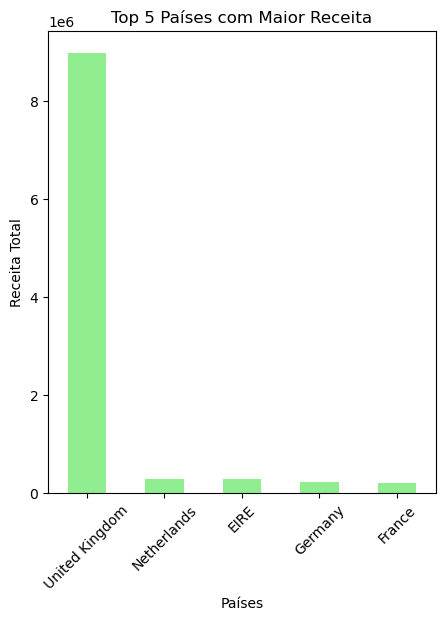

In [12]:
# Gera o gráfico de barras para a receita por país
plt.figure(figsize=(5,6))
receita_por_pais.sort_values(ascending=False).head(5).plot(kind='bar', color='lightgreen')

plt.title('Top 5 Países com Maior Receita')
plt.xlabel('Países')
plt.ylabel('Receita Total')
plt.xticks(rotation=45)
plt.show()


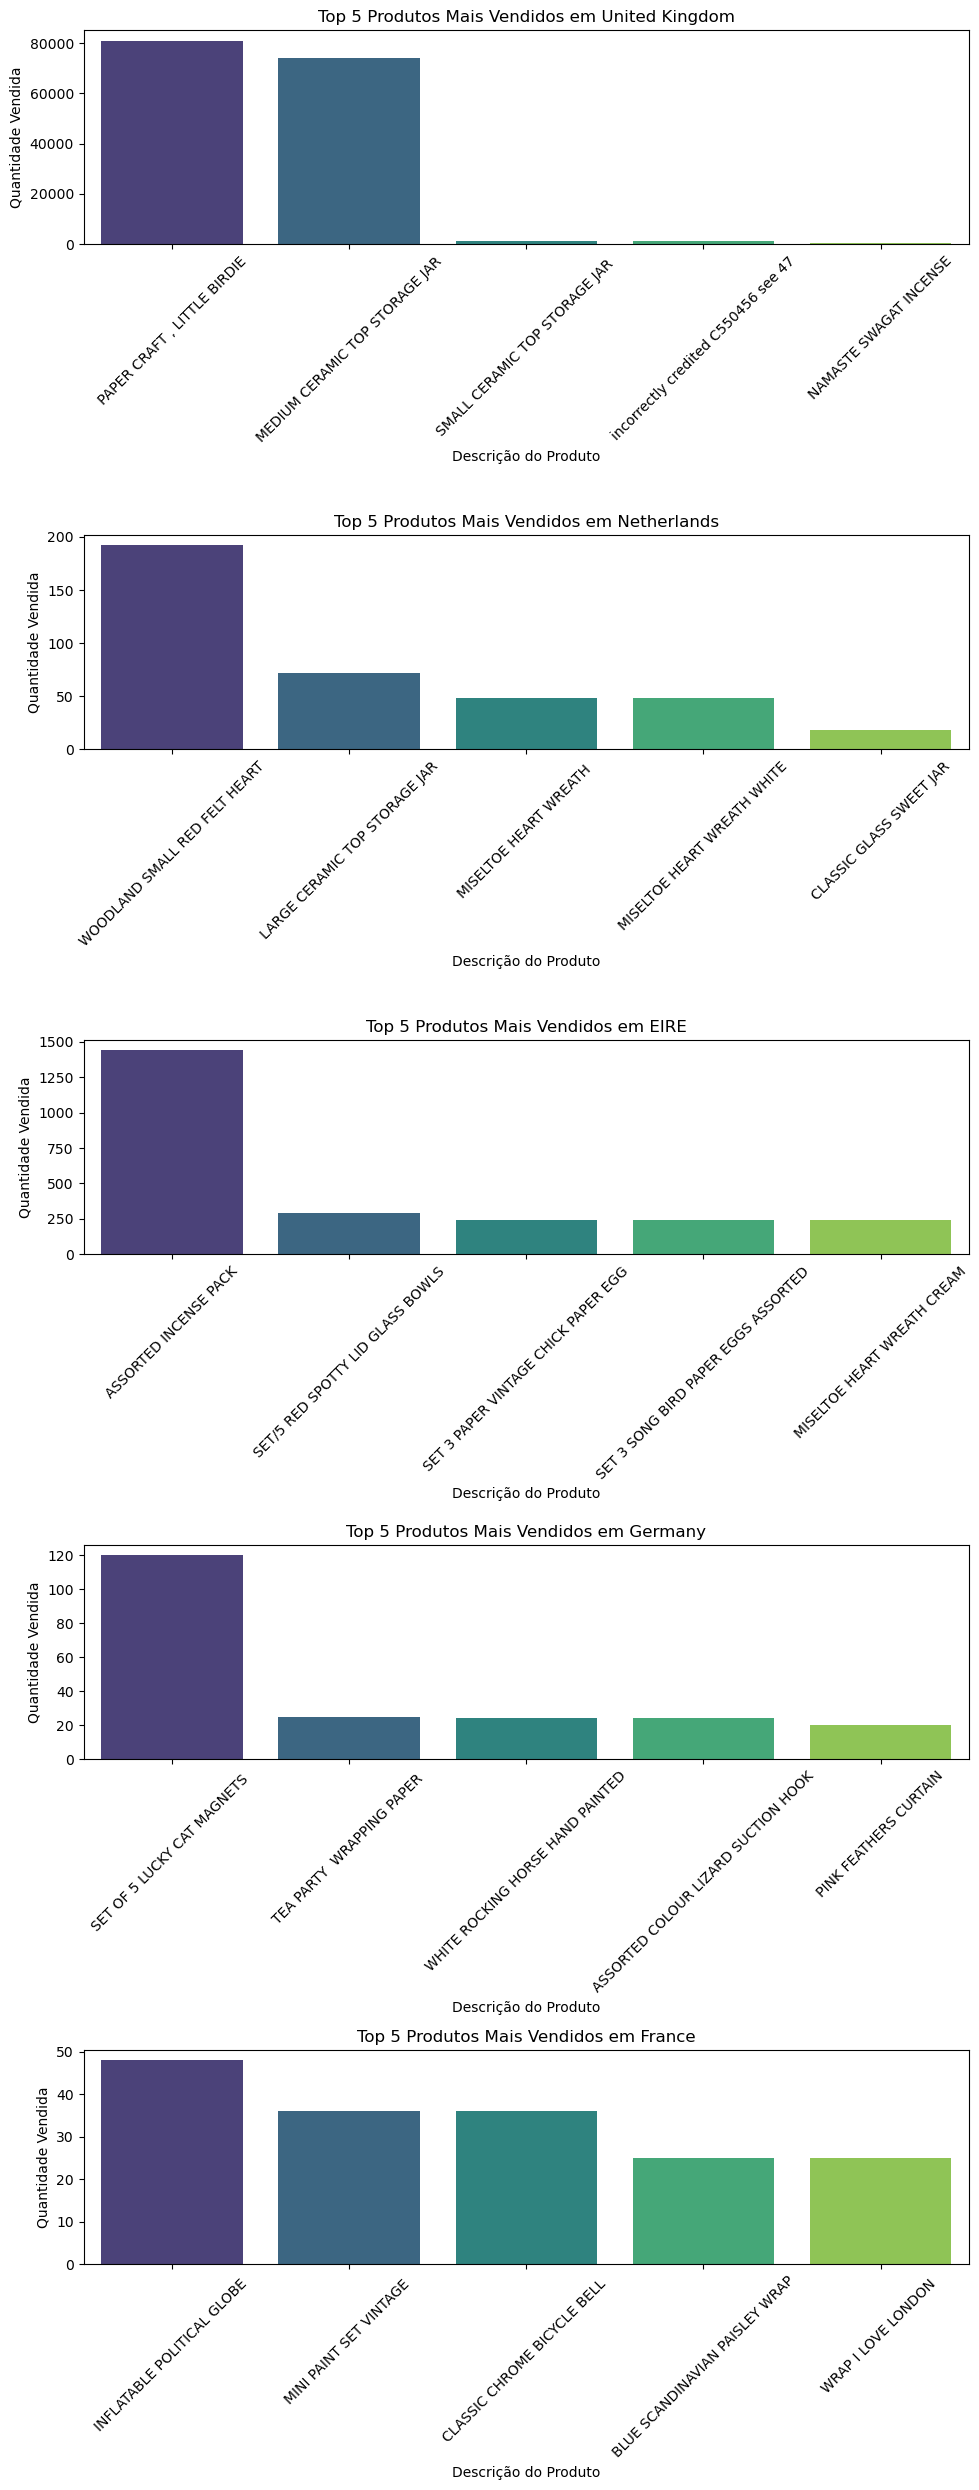

In [13]:
# Criar figura e eixos para os gráficos
fig, axs = plt.subplots(len(paises_interesse), 1, figsize=(10, 25))

# Gerar gráfico para cada país
for ax, pais in zip(axs, paises_interesse):
    dados = top_5_produtos_por_pais(pais)
    
    srn.barplot(data=dados, x='Descricao', y='Quantidade', ax=ax, palette='viridis')
    
    ax.set_title(f'Top 5 Produtos Mais Vendidos em {pais}')
    ax.set_xlabel('Descrição do Produto')
    ax.set_ylabel('Quantidade Vendida')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

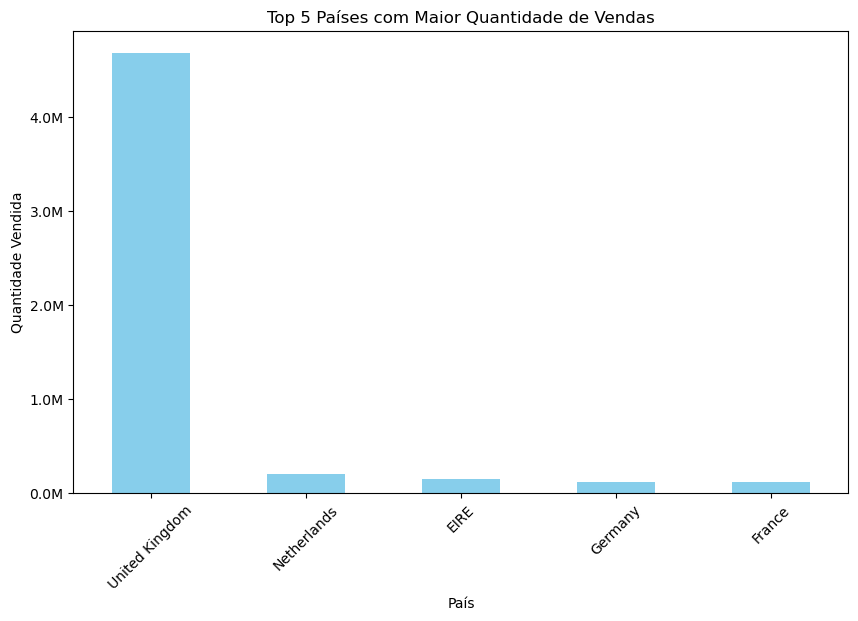

In [14]:
# Gera o gráfico de barras com formatação no eixo Y
plt.figure(figsize=(10,6))
top_5_paises.plot(kind='bar', color='skyblue')

# Adiciona título e rótulos
plt.title('Top 5 Países com Maior Quantidade de Vendas')
plt.xlabel('País')
plt.ylabel('Quantidade Vendida')

# Formata o eixo Y para exibir valores em milhões (se necessário)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Ajusta a rotação dos nomes dos países no eixo X
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()


**4. Fechamento e Insights:**

* Identificação de tendências e comportamentos relevantes.
* Recomendações para a empresa baseada na análise.

**Insights sobre Vendas por País**

* Dominância do Mercado no Reino Unido:

O Reino Unido é, de longe, o país com o maior volume de vendas, representando 4.684.355 unidades e gerando uma receita total de aproximadamente 8.986.430,94.
Isso sugere que o mercado britânico é um alvo prioritário para estratégias de vendas e marketing.

* Comparação com Outros Países:

Netherlands, EIRE, Alemanha e França têm volumes de vendas significativamente menores em comparação ao Reino Unido, com quantidades de vendas variando de 112.104 a 200.937.
O Netherlands e EIRE mostram potencial, mas suas vendas são ainda muito inferiores ao volume do Reino Unido, sugerindo que pode haver espaço para crescimento nestes mercados.

* Oportunidades de Crescimento:

Alemanha e França, apesar de suas quantidades de vendas, também estão atrás do Reino Unido. Investimentos em campanhas de marketing direcionadas, promoções ou novas linhas de produtos nesses países podem ajudar a aumentar o volume de vendas.
Análise da Receita:

A receita por unidade vendida parece variar consideravelmente entre os países. Embora o Reino Unido tenha o maior volume de vendas, uma análise mais detalhada sobre a margem de lucro por país pode revelar se os mercados menores estão oferecendo melhores margens.
Por exemplo, a França apresenta uma receita total de 209.715,11, o que indica que as vendas podem não estar tão alinhadas com o volume. Pode ser útil investigar se há produtos que têm maior aceitação na França que podem ser impulsionados.

* Previsões de Vendas:

Considerando o desempenho atual e a identificação de tendências de crescimento, pode ser útil construir modelos preditivos para prever vendas futuras em cada país. Isso pode incluir análises sazonais ou baseadas em campanhas de marketing anteriores.
Identificar padrões de consumo pode ajudar a adaptar estoques e planejamentos para atender melhor a demanda em cada país.

* Sugestões de Ações:

    Foco no Reino Unido: Fortalecer a presença no Reino Unido, talvez através de promoções ou novos lançamentos.

    Explorar Novos Mercados: Avaliar o potencial de mercado na Holanda e EIRE, talvez realizando pesquisas de mercado para entender as preferências locais.

    Análise de Receita: Profundar a análise sobre os produtos vendidos em cada país e suas margens para otimizar o portfólio.
    
    Modelo de Previsão: Considerar a implementação de um modelo de previsão de vendas para todos os países, com revisões regulares baseadas nas novas informações de mercado.

**Verificando a quantidade de habitantes e o PIB de cada país:**

* Vendas por Habitante:

O Reino Unido apresenta um valor elevado de vendas por habitante, indicando que os consumidores estão comprando mais produtos em comparação com outros países.

A Irlanda também mostra um bom número de vendas por habitante, sugerindo um forte poder de compra.

* Vendas em Relação ao PIB:

O Reino Unido se destaca, com vendas que representam uma fração considerável do poder de compra (PIB per capita) de seus habitantes.

Países como Alemanha e França têm uma relação baixa, o que pode indicar que o volume de vendas não está tão alinhado com o potencial de consumo da população.

**RECOMENDAÇÕES:**

* Investimento no Reino Unido e na Irlanda: Ambos os países têm um alto volume de vendas em relação à sua população e ao PIB per capita, sugerindo que eles são mercados muito promissores.

* Explorar Mercados Menores: Embora os Países Baixos e a EIRE tenham populações menores, sua capacidade de compra é alta, o que justifica um foco em campanhas direcionadas.

* Ajustar Estratégias na Alemanha e França: A baixa relação de vendas em relação ao PIB sugere que pode haver uma desconexão entre o que é oferecido e o que os consumidores estão dispostos a comprar. Uma pesquisa de mercado poderia ajudar a entender melhor as preferências locais.